# FordGo Bike System Data Analysis
## by Mohit Patil



<a id='intro'></a>
## Introduction
# FordGo Bike System Data Analysis

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# 1] What is the Average Duration Of Trips?

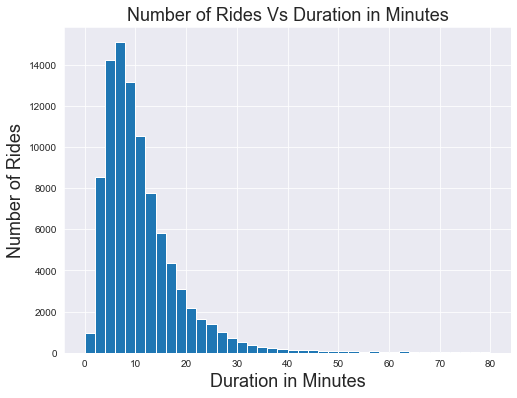

In [40]:
plt.figure(figsize=(8,6))
plt.hist(data=ford,x='duration_min',color=base_color,bins=bin_edges)
plt.title('Number of Rides Vs Duration in Minutes',fontsize=18)
plt.xlabel('Duration in Minutes',fontsize=18)
plt.ylabel('Number of Rides',fontsize=18);

### The insight reveals that most of the rides range from 5 to 8 minutes with a gradual decrease from 8 to 50 minutes.5 to 10 minutes rides do not seem too much and hence these rides must be related to office hours with most of the people the service for office purposes to ride from their home to office and vice versa.

# 2]How is the User Distribution distributed ?

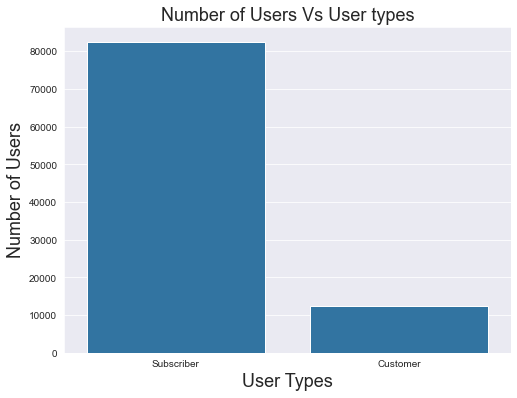

In [41]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford,x='user_type',color=base_color)
plt.title('Number of Users Vs User types',fontsize=18)
plt.xlabel('User Types',fontsize=18)
plt.ylabel('Number of Users',fontsize=18);

### Most of the users are subscribers approximately ranging upto 82000. The customer type is way less at 11000.The service seems to be more inclined to the subscribers and the nature of the subscribers would be evaluated further.

# 3] What is the Average Distribution of Trip in minutes according to the User type ? 

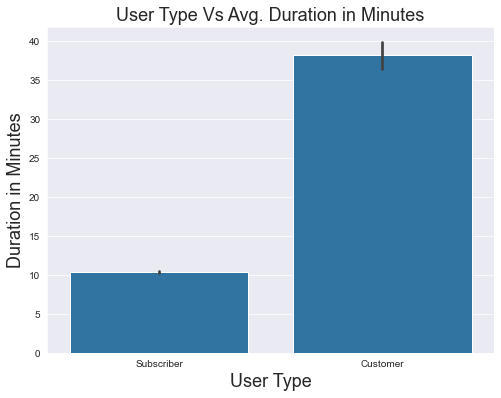

In [60]:
plt.figure(figsize=(8,6))
plt.title('User Type Vs Avg. Duration in Minutes',fontsize=18)
sb.barplot(data=ford,x='user_type',y='duration_min',color=base_color);
plt.xlabel('User Type',fontsize=18)
plt.ylabel('Duration in Minutes',fontsize=18);

### The average duration of subscribers are way less than customers.Customers generally tend to take longer rides as compared to subscribers.The average of customers rides is approximately 40 whereas for subscribers,It is as small as 10.The customers nature can be attributed to tourists or students who explore new place and hence reflecting to a increase in the average duration.The subscribers on the other hand are mainly attributed to daily trips which they may take to reach their offices from home and vice versa.

# 4] What is the Average Trip Duration in Minutes according to the user types based on weekdays ?

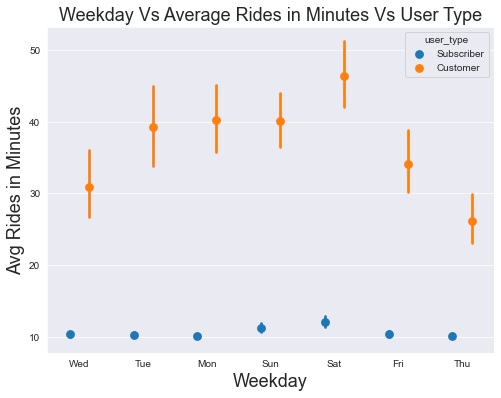

In [62]:
plt.figure(figsize=(8,6))
sb.pointplot(data=ford, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Weekday',fontsize=18);
plt.ylabel('Avg Rides in Minutes',fontsize=18);
plt.title('Weekday Vs Average Rides in Minutes Vs User Type',fontsize=18);

#### As Expected,Customers have a higher ride duration of approximately 40 minutes whereas the subscribers have a average ride duration of 10 minutes.Subscribers are office going people whereas customers are mostly tourists or students who explore new places.

# 5] How does the number of rides vary according to the start time and the weekday for Subscribers?

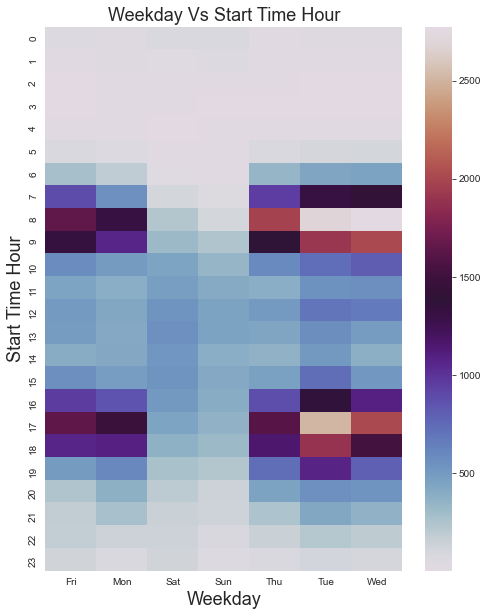

In [50]:
plt.figure(figsize=(8,10))
ford_subs = ford.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
ford_subs = ford_subs.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
heat_map = sb.heatmap(ford_subs, cmap = 'twilight')

plt.title("Weekday Vs Start Time Hour", fontsize=18)
plt.xlabel('Weekday', fontsize = 18)
plt.ylabel('Start Time Hour', fontsize=18);

## I learned that the average duration in minutes for rides range from 10 to 20 minutes.Out of these rides most of the people are subscribers and a small amount of people are customers.Besides this,subscribers have a realtively lower average as compared to the customers.Subscribers average duration of ride are 10 minutes whereas for customers the average is 40 minutes.Maximum duration rides are generally observed on weekends i.e Saturdays and Sundays.